For those who’ve tinkered with Matplotlib before, you may have wondered, “why does it take me 10 lines of code just to make a decent-looking histogram?”

Well, if you’re looking for a simpler way to plot attractive charts, then you’ll love Seaborn. We’ll walk you through everything you need to know to get started, and we’ll use a fun Pokémon dataset

[Pokemon.csv](https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv)

## Introduction to Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborn’s official website, they state:

    "If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too."

We’ve found this to be a pretty good summary of Seaborn’s strengths. In practice, the “well-defined set of hard things” includes:

- Using default themes that are aesthetically pleasing.
- Setting custom color palettes.
- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Visualizing information from matrices and DataFrames.

Those last three points are why **Seaborn is our tool of choice for Exploratory Analysis**. It makes it very easy to “get to know” your data quickly and efficiently.

However, Seaborn is a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib, and we’ll cover how to do that as well.

### How to Learn Seaborn, the Self-Starter Way:

- First, understand the basics and paradigms of the library. Each library approaches data visualization differently, so it's important to understand how Seaborn "thinks about" the problem.

- Then, fire up a dataset for practice. Learning in context is the best way to master a new skill quickly.

- Finally, refer to galleries to spark ideas and documentation to customize your charts. Since you've already learned the library's paradigms and had some hands-on practice, you'll easily find what you need.

This process will give you intuition about what you can do with Seaborn, leaving documentation to serve as further guidance. This is the fastest way to go from zero to proficient.

A quick tip before we begin:

We tried to make this tutorial as streamlined as possible, which means we won’t go into too much detail for any one topic. It’s helpful to have the Seaborn documentation open beside you, in case you want to learn more about a feature.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
data = pd.read_csv('Pokemon.csv', index_col=0)

In [11]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


As you can see, we have combat stats data for the original 151 (a.k.a best 151) Pokémon.

### Seaborn's plotting functions

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


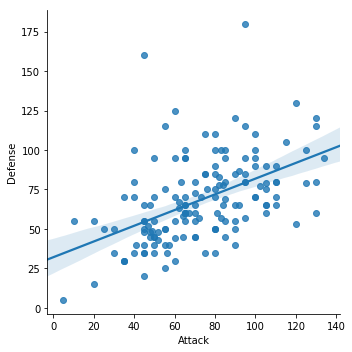

In [24]:
sns.lmplot(x='Attack', y='Defense', data=data)
# sns don't have dedicated scatter plot, we use this function ti fit rgression line

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

- First, we'll set *fit_reg=False* to remove the regression line, since we only want a scatter plot.
- Then, we'll set _hue='Stage'_ to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

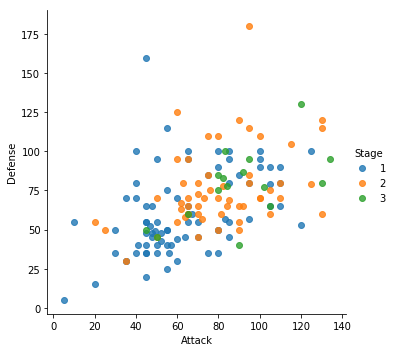

In [21]:
sns.lmplot(x='Attack', y='Defense', data=data, fit_reg=False, hue='Stage')

(-20, 141.9881096001028)

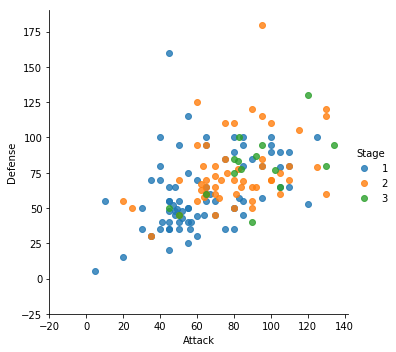

In [31]:
# plot using seaborn
sns.lmplot(x='Attack', y='Defense', data=data, fit_reg=False, hue='Stage')

# tweak using matplotlib
plt.ylim(-25, None)
plt.xlim(-20, None)

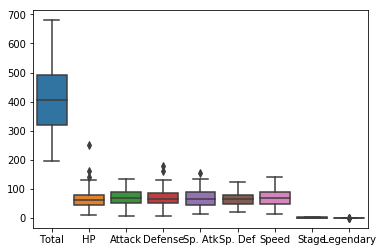

In [33]:
sns.boxplot(data=data)

### We can remove the total as we have individual stats, and we can remove stage and legendary as they are not combat stats

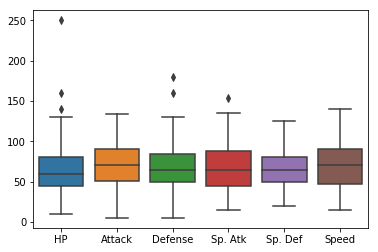

In [35]:
stats_data = data.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_data)

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


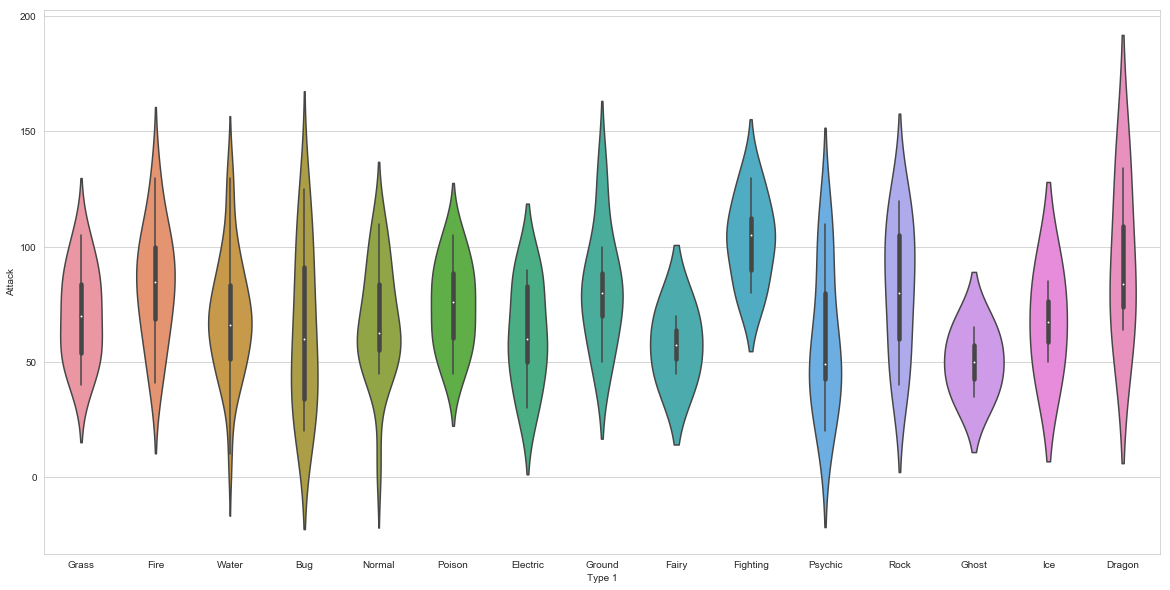

In [44]:
# set theme
sns.set_style('whitegrid')

# figure size
plt.figure(figsize=(20,10))

# violin plot
sns.violinplot(x='Type 1', y='Attack', data=data)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

Let's use [Bulbapedia](http://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) to help us create a new color palette

In [45]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


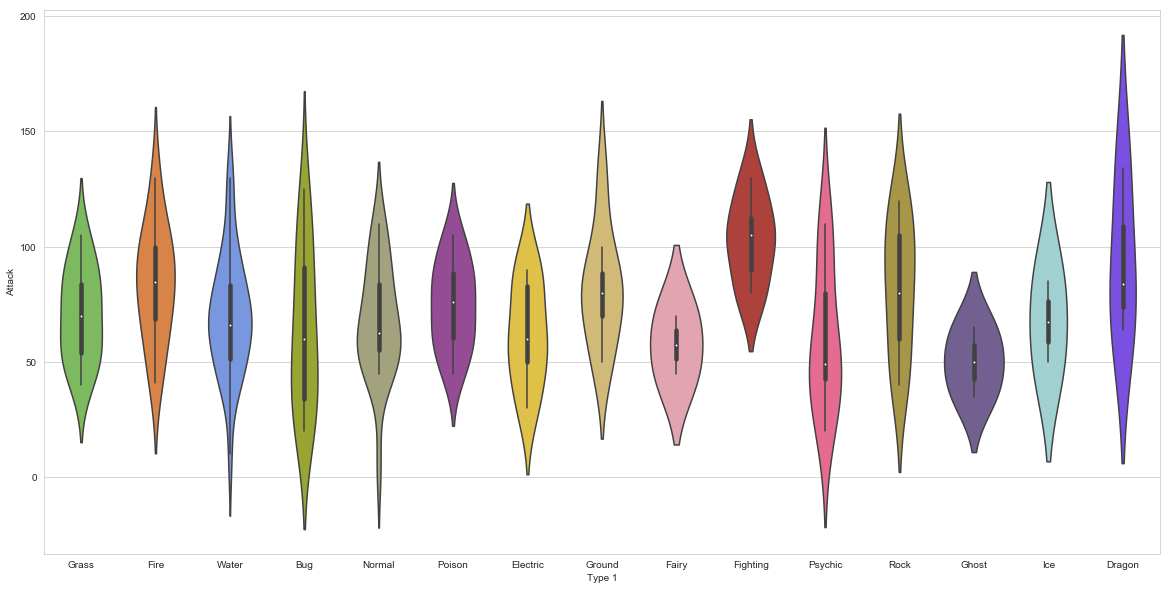

In [47]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Type 1', y='Attack', data=data, palette=pkmn_type_colors)

Much better!

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

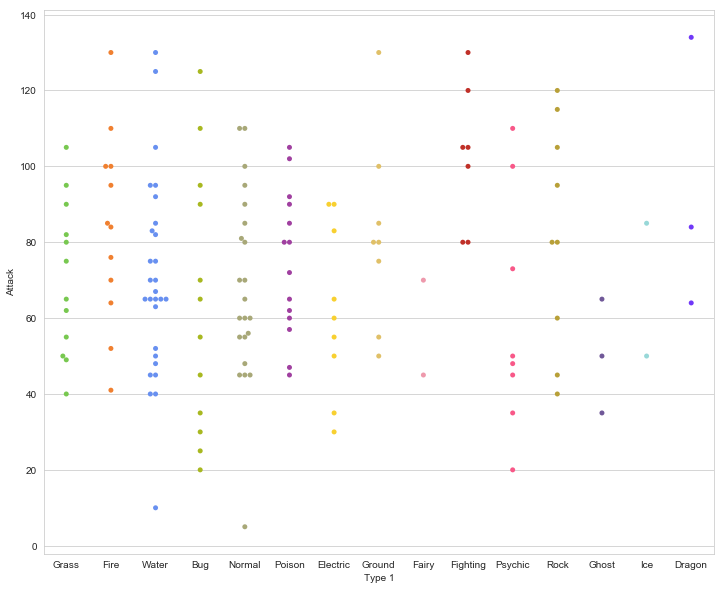

In [51]:
# Swarm plot with pokemon color palette
plt.figure(figsize=(12, 10))
sns.swarmplot(x='Type 1', y='Attack', data=data, palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?
### Overlaying plots
The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

1. First, we'll make our figure larger using Matplotlib.
2. Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
3. Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
4. Finally, we'll set a title using Matplotlib.

Text(0.5,1,'Pokemon - Attack By Type')

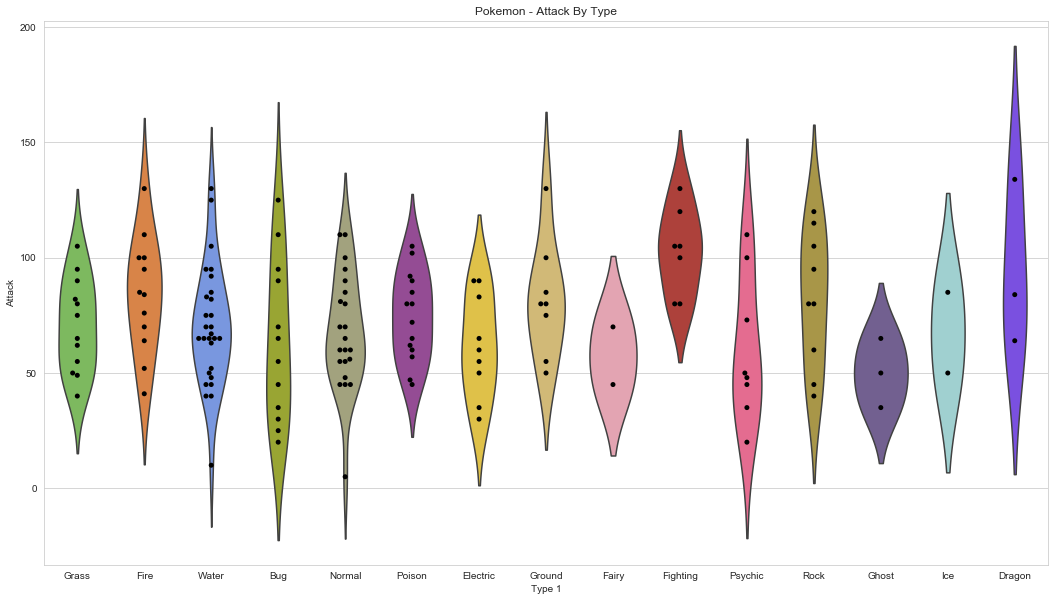

In [57]:
plt.figure(figsize=(18, 10))
sns.violinplot(x='Type 1', y='Attack', data=data, palette=pkmn_type_colors, inner=None)
sns.swarmplot(x='Type 1', y='Attack', data=data, color='black')
plt.title('Pokemon - Attack By Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

### Putting it all together

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

- First, the DataFrame to melt.
- Second, ID variables to keep (Pandas will melt all of the other ones).
- Finally, a name for the new, melted variable.

In [58]:
melted_data = pd.melt(stats_data, id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stats')
melted_data.head()

,Name,Type 1,Type 2,Stats,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In [59]:
print(stats_data.shape)
print(melted_data.shape)

(151, 9)
(906, 5)


Now we can make a swarm plot with melted_df.

- But this time, we're going to set x='Stat' and y='value' so our swarms are separated by stat.
- Then, we'll set hue='Type 1' to color our points by the Pokémon type.
- Separate points by hue using the argument split=True .
- Use our custom Pokemon color palette.
- Adjust the y-axis limits to end at 0.
- Place the legend to the right.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


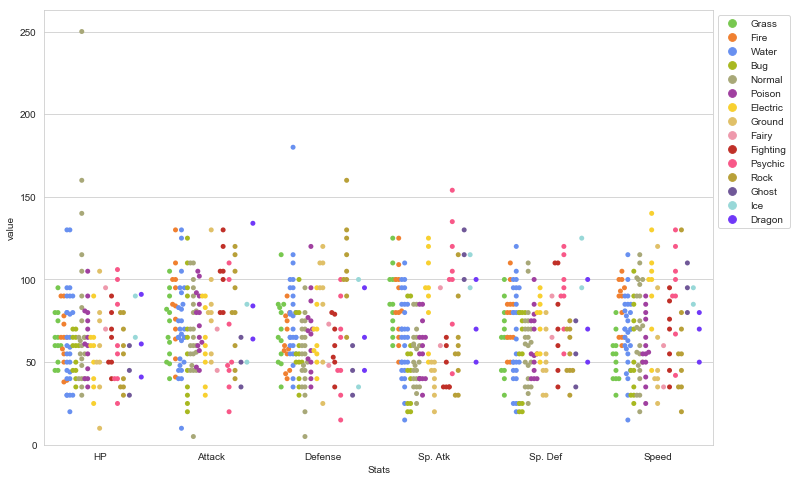

In [66]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Stats', y='value', data=melted_data, 
              hue='Type 1',
              split=True,  # Separate points by hue
              palette=pkmn_type_colors
             )
plt.ylim(0, None)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Pokédex (mini-gallery).

We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.

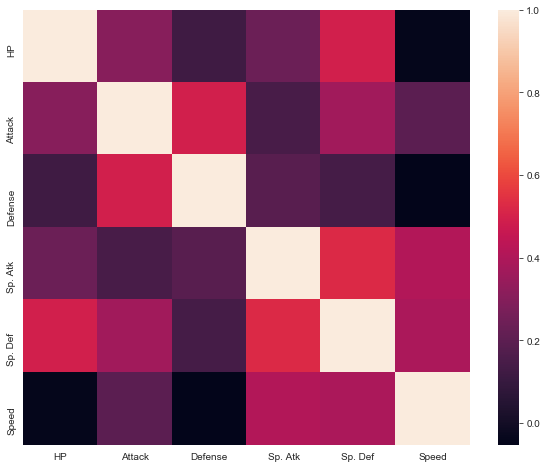

In [69]:
# calculate correlations
corr = stats_data.corr()
plt.figure(figsize=(10, 8))
# heatmap
sns.heatmap(corr)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


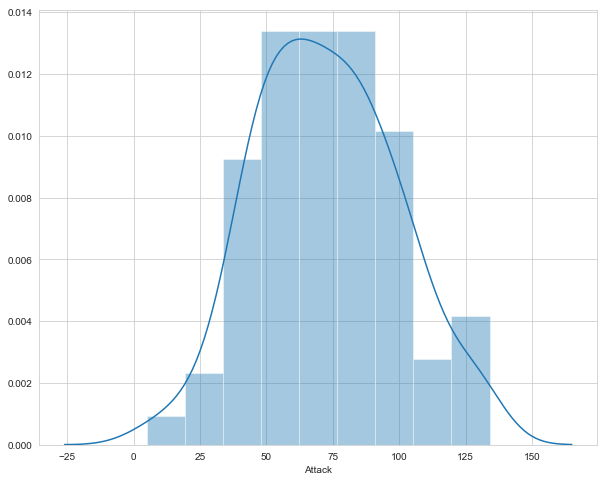

In [72]:
plt.figure(figsize=(10, 8))
# Distribution Plot (a.k.a. Histogram), Histograms allow you to plot the distributions of numeric variables.
sns.distplot(data.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

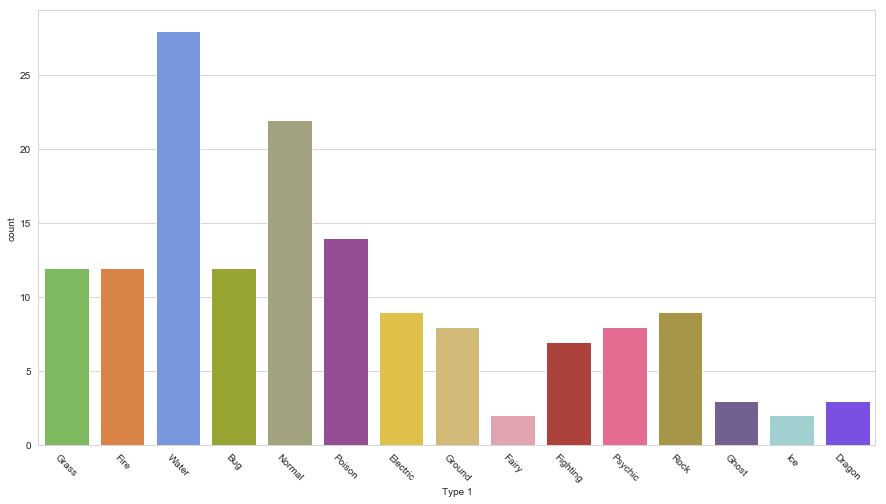

In [75]:
plt.figure(figsize=(15, 8))
# Bar plots help you visualize the distributions of categorical variables.
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=data, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


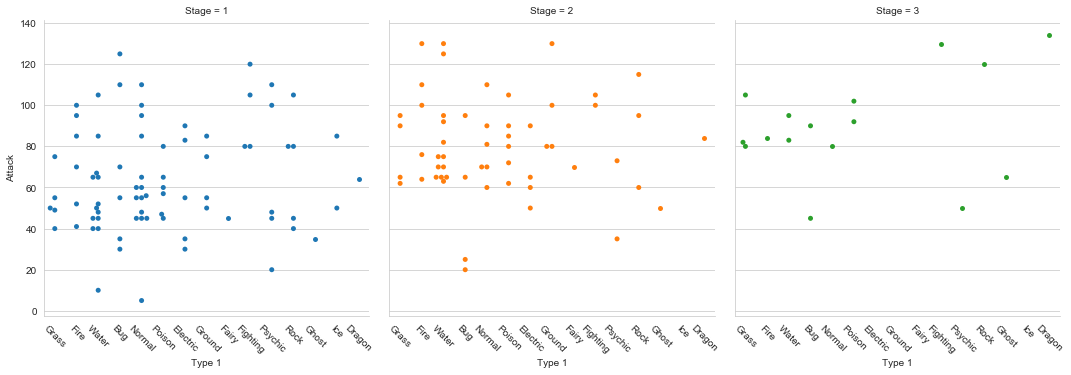

In [76]:
# Factor plots make it easy to separate plots by categorical classes
g = sns.factorplot(x='Type 1',
                   y='Attack',
                   data=data,
                   hue='Stage',  # color by stage
                   col='Stage',  # seperate by stage
                   kind='swarm') # swarmplot

# Rotate x-axis by -45
g.set_xticklabels(rotation=-45)

# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

Density plots display the distribution between two variables.

Tip: Consider overlaying this with a scatter plot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


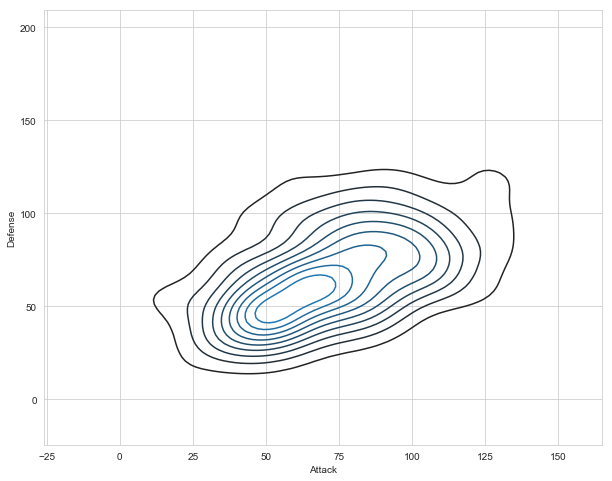

In [79]:
plt.figure(figsize=(10, 8))
# density plot
sns.kdeplot(data.Attack, data.Defense)

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


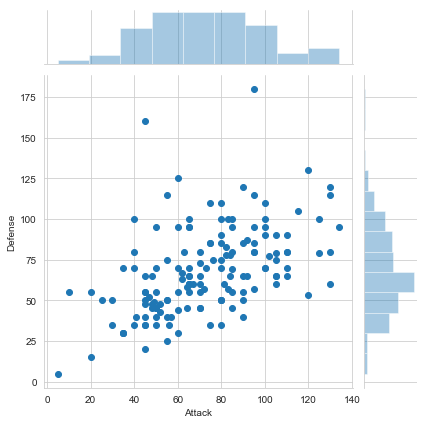

In [81]:
# plt.figure(figsize=(20, 10))
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=data)